Juliet Holmes mh3kh@virginia.edu¶

DS 5001

August 2022

# 7_Latent Dirichlet Allocation 

---

The purpose of this notebook is to use LDA as a Topic Modeling approach.

dependencies: BOW-F4.csv, VOCAB-F4.csv, LIB-F3.csv

output: TOPIC.csv, THETA.csv, PHI.csv

code files referenced: M08_02_LDASciKItLearn.ipynb


---
---

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [2]:
n_terms = 1000
n_topics = 20
max_iter = 20
# n_top_terms = 7
doc_topic_prior = .1 # Prior of document topic distribution alpha. Defaults to 1 / n_components.
topic_word_prior = .1 # Prior of topic word distribution beta. Defaults to 1 / n_components.

# Prepare data

In [3]:
BOW = pd.read_csv('BOW-F4.csv').set_index(['doc_id', 'doc_title', 'term_str'])

In [4]:
BOW

n     tfidf
doc_id doc_title                  term_str                         
0      Abstract data type         1974                1.0  0.072767
                                  32                  1.0  0.073347
                                  abstract            5.0  0.282039
                                  abstract data       2.0  0.142374
                                  abstract data type  2.0  0.150581
...                                                   ...       ...
4589   JavaScript InfoVis Toolkit tools               1.0  0.089121
                                  trees               3.0  0.284750
                                  visualization       2.0  0.181003
                                  visualizations      3.0  0.379171
                                  web                 1.0  0.085357

[212028 rows x 2 columns]

In [5]:
VOCAB = pd.read_csv("VOCAB-F4.csv").set_index("term_str")

In [6]:
VOCAB

,term_rank,n,n_chars,n_tokens,tfidf_mean,df,dfidf,p,i,h,...,n_pos,cat_pos,stem_porter,stem_snowball,stem_lancaster,lemma,stop,term_rank2,zipf_k,zipf_k2
term_str,,,,,,,,,,,,,,,,,,,,,
data,1,4996,4,1,0.037863,1484,2416.974053,0.016115,5.955416,0.095974,...,10.0,"{'VBZ', 'NN', 'FW', 'JJ', 'NNP', 'VB', 'VBN', ...",data,data,dat,data,0,1,4996,4996
used,2,2587,4,1,0.020109,1686,2435.553906,0.008345,6.904910,0.057620,...,3.0,"{'VBD', 'JJ', 'VBN'}",use,use,us,used,0,2,5174,5174
distribution,3,1923,12,1,0.023496,538,1663.765930,0.006203,7.332831,0.045485,...,2.0,"{'NNP', 'NN'}",distribut,distribut,distribut,distribution,0,3,5769,5769
function,4,1755,8,1,0.020344,740,1948.111147,0.005661,7.464719,0.042258,...,5.0,"{'NN', 'JJ', 'NNP', 'VB', 'VBP'}",function,function,funct,function,0,4,7020,7020
information,5,1663,11,1,0.018300,750,1959.912980,0.005364,7.542401,0.040460,...,2.0,"{'NNP', 'NN'}",inform,inform,inform,information,0,5,8315,8315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chemical,3996,16,8,1,0.000404,13,110.025817,0.000052,14.241974,0.000735,...,2.0,"{'NNP', 'NN'}",chemic,chemic,chem,chemical,0,388,63936,6208
squared error,3997,16,13,2,0.000421,13,110.025817,0.000052,14.241974,0.000735,...,NaN,NaN,squared error,squared error,squared error,squared error,0,388,63952,6208
pattern matching,3998,16,16,2,0.000442,12,102.948019,0.000052,14.241974,0.000735,...,NaN,NaN,pattern match,pattern match,pattern matching,pattern matching,0,388,63968,6208


In [7]:
#drop NAs
VOCAB = VOCAB.dropna()

In [8]:
LIB = pd.read_csv("LIB-F3.csv").set_index(["doc_id","doc_title"])

In [9]:
LIB

,,doc_url,doc_summary,doc_content,categories,doc_summary_clean,doc_content_clean
doc_id,doc_title,,,,,,
0,Abstract data type,https://en.wikipedia.org/wiki/Abstract_data_type,"<p>In computer science, an <b>abstract data ty...","<p>In computer science, an <b>abstract data ty...",Abstract data types,"In computer science, an abstract data type (AD...","In computer science, an abstract data type (AD..."
1,Associative array,https://en.wikipedia.org/wiki/Associative_array,"<link rel=""mw-deduplicated-inline-style"" href=...","<link rel=""mw-deduplicated-inline-style"" href=...",Abstract data types,"In computer science, an associative array, ma...","In computer science, an associative array, ma..."
2,Augmented map,https://en.wikipedia.org/wiki/Augmented_map,"<p>In computer science, the <b>augmented map</...","<p>In computer science, the <b>augmented map</...",Abstract data types,"In computer science, the augmented map is an a...","In computer science, the augmented map is an a..."
3,Cardinal tree,https://en.wikipedia.org/wiki/Cardinal_tree,<p>A <b>cardinal tree</b> (or trie) of degree ...,<p>A <b>cardinal tree</b> (or trie) of degree ...,Abstract data types,"A cardinal tree (or trie) of degree k, by anal...","A cardinal tree (or trie) of degree k, by anal..."
4,Collection (abstract data type),https://en.wikipedia.org/wiki/Collection_(abst...,"<p>In computer programming, a <b>collection</b...","<p>In computer programming, a <b>collection</b...",Abstract data types,"In computer programming, a collection is a gro...","In computer programming, a collection is a gro..."
...,...,...,...,...,...,...,...
4585,Variable shadowing,https://en.wikipedia.org/wiki/Variable_shadowing,"<p>In computer programming, <b>variable shadow...","<p>In computer programming, <b>variable shadow...",Variable (computer science),"In computer programming, variable shadowing oc...","In computer programming, variable shadowing oc..."
4586,Volatile (computer programming),https://en.wikipedia.org/wiki/Volatile_(comput...,"<p><br>\nIn computer programming, particularly...","<p><br>\nIn computer programming, particularly...",Variable (computer science),"In computer programming, particularly in the ...","In computer programming, particularly in the ..."
4587,Google Chart API,https://en.wikipedia.org/wiki/Google_Chart_API,<p>The <b>Google Chart API</b> is an interacti...,<p>The <b>Google Chart API</b> is an interacti...,Visualization API,The Google Chart API is an interactive Web ser...,The Google Chart API is an interactive Web ser...


In [10]:
#remove duplicate "abstract data types"
LIB["categories"] = LIB["categories"].replace('Abstract data types|Abstract data types', 'Abstract data types')

In [11]:
DOC = pd.read_csv("LIB.csv").set_index(["doc_id","doc_title"])

In [12]:
DOC

,,doc_url,doc_summary,doc_content,categories,doc_summary_clean,doc_content_clean
doc_id,doc_title,,,,,,
0,Abstract data type,https://en.wikipedia.org/wiki/Abstract_data_type,"<p>In computer science, an <b>abstract data ty...","<p>In computer science, an <b>abstract data ty...",Abstract data types|Abstract data types,"In computer science, an abstract data type (AD...","In computer science, an abstract data type (AD..."
1,Associative array,https://en.wikipedia.org/wiki/Associative_array,"<link rel=""mw-deduplicated-inline-style"" href=...","<link rel=""mw-deduplicated-inline-style"" href=...",Abstract data types|Abstract data types,"In computer science, an associative array, ma...","In computer science, an associative array, ma..."
2,Augmented map,https://en.wikipedia.org/wiki/Augmented_map,"<p>In computer science, the <b>augmented map</...","<p>In computer science, the <b>augmented map</...",Abstract data types|Abstract data types,"In computer science, the augmented map is an a...","In computer science, the augmented map is an a..."
3,Cardinal tree,https://en.wikipedia.org/wiki/Cardinal_tree,<p>A <b>cardinal tree</b> (or trie) of degree ...,<p>A <b>cardinal tree</b> (or trie) of degree ...,Abstract data types|Abstract data types,"A cardinal tree (or trie) of degree k, by anal...","A cardinal tree (or trie) of degree k, by anal..."
4,Collection (abstract data type),https://en.wikipedia.org/wiki/Collection_(abst...,"<p>In computer programming, a <b>collection</b...","<p>In computer programming, a <b>collection</b...",Abstract data types|Abstract data types,"In computer programming, a collection is a gro...","In computer programming, a collection is a gro..."
...,...,...,...,...,...,...,...
4585,Variable shadowing,https://en.wikipedia.org/wiki/Variable_shadowing,"<p>In computer programming, <b>variable shadow...","<p>In computer programming, <b>variable shadow...",Variable (computer science),"In computer programming, variable shadowing oc...","In computer programming, variable shadowing oc..."
4586,Volatile (computer programming),https://en.wikipedia.org/wiki/Volatile_(comput...,"<p><br>\nIn computer programming, particularly...","<p><br>\nIn computer programming, particularly...",Variable (computer science),"In computer programming, particularly in the ...","In computer programming, particularly in the ..."
4587,Google Chart API,https://en.wikipedia.org/wiki/Google_Chart_API,<p>The <b>Google Chart API</b> is an interacti...,<p>The <b>Google Chart API</b> is an interacti...,Visualization API,The Google Chart API is an interactive Web ser...,The Google Chart API is an interactive Web ser...


In [13]:
DOC = DOC[["doc_summary_clean"]]

In [14]:
DOC

,,doc_summary_clean
doc_id,doc_title,
0,Abstract data type,"In computer science, an abstract data type (AD..."
1,Associative array,"In computer science, an associative array, ma..."
2,Augmented map,"In computer science, the augmented map is an a..."
3,Cardinal tree,"A cardinal tree (or trie) of degree k, by anal..."
4,Collection (abstract data type),"In computer programming, a collection is a gro..."
...,...,...
4585,Variable shadowing,"In computer programming, variable shadowing oc..."
4586,Volatile (computer programming),"In computer programming, particularly in the ..."
4587,Google Chart API,The Google Chart API is an interactive Web ser...


# VOCAB → SIGS

In [15]:
SIGS = VOCAB[VOCAB.stop == 0].sort_values('dfidf', ascending=False).head(n_terms).index

In [16]:
SIGS

Index(['used', 'data', 'set', 'theory', 'example', 'called', 'analysis',
       'statistics', 'information', 'function',
       ...
       'shannon', 'item', 'enterprise', 'handle', 'david', 'hierarchy',
       'reduced', 'label', 'corresponds', 'aspects'],
      dtype='object', name='term_str', length=1000)

# BOW → X

In [17]:
BOW

n     tfidf
doc_id doc_title                  term_str                         
0      Abstract data type         1974                1.0  0.072767
                                  32                  1.0  0.073347
                                  abstract            5.0  0.282039
                                  abstract data       2.0  0.142374
                                  abstract data type  2.0  0.150581
...                                                   ...       ...
4589   JavaScript InfoVis Toolkit tools               1.0  0.089121
                                  trees               3.0  0.284750
                                  visualization       2.0  0.181003
                                  visualizations      3.0  0.379171
                                  web                 1.0  0.085357

[212028 rows x 2 columns]

In [18]:
X = BOW.n.unstack(fill_value=0)[SIGS]

In [19]:
X

,term_str,used,data,set,theory,example,called,analysis,statistics,information,function,...,shannon,item,enterprise,handle,david,hierarchy,reduced,label,corresponds,aspects
doc_id,doc_title,,,,,,,,,,,,,,,,,,,,,
0,Abstract data type,1.0,10.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Associative array,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Augmented map,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Cardinal tree,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Collection (abstract data type),0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4585,Variable shadowing,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4586,Volatile (computer programming),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4587,Google Chart API,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Generate Model
We run Scikit Learn's LatentDirichletAllocation algorithm and extract the THETA and PHI tables.

In [20]:
lda_engine = LDA(n_components=n_topics, max_iter=max_iter, learning_offset=50., random_state=0)

## THETA

In [21]:
THETA = pd.DataFrame(lda_engine.fit_transform(X.values), index=X.index)
THETA.columns.name = 'topic_id'

In [22]:
THETA

,topic_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
doc_id,doc_title,,,,,,,,,,,,,,,,,,,,
0,Abstract data type,0.000376,0.213703,0.000376,0.146816,0.000376,0.000376,0.000376,0.248771,0.000376,0.076901,0.000376,0.039239,0.030492,0.000376,0.000376,0.161865,0.000376,0.000376,0.000376,0.077701
1,Associative array,0.021529,0.492041,0.000667,0.000667,0.000667,0.000667,0.000667,0.000667,0.091850,0.149439,0.000667,0.143912,0.000667,0.000667,0.000667,0.091895,0.000667,0.000667,0.000667,0.000667
2,Augmented map,0.001316,0.553640,0.001316,0.001316,0.001316,0.001316,0.001316,0.001316,0.001316,0.001316,0.001316,0.001316,0.001316,0.001316,0.001316,0.343125,0.001316,0.001316,0.080867,0.001316
3,Cardinal tree,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.574986,0.002778,0.002778,0.002778,0.002778,0.002778,0.002778,0.375014,0.002778,0.002778,0.002778,0.002778
4,Collection (abstract data type),0.000862,0.505851,0.000862,0.194336,0.000862,0.000862,0.000862,0.141175,0.034276,0.111432,0.000862,0.000862,0.000862,0.000862,0.000862,0.000862,0.000862,0.000862,0.000862,0.000862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4585,Variable shadowing,0.000704,0.000704,0.000704,0.872617,0.000704,0.000704,0.000704,0.000704,0.000704,0.019719,0.000704,0.000704,0.000704,0.000704,0.000704,0.077553,0.000704,0.000704,0.000704,0.018844
4586,Volatile (computer programming),0.001020,0.001020,0.001020,0.891058,0.001020,0.001020,0.001020,0.001020,0.001020,0.001020,0.001020,0.090575,0.001020,0.001020,0.001020,0.001020,0.001020,0.001020,0.001020,0.001020
4587,Google Chart API,0.000862,0.000862,0.000862,0.000862,0.000862,0.000862,0.000862,0.049304,0.000862,0.000862,0.000862,0.760439,0.021171,0.000862,0.000862,0.000862,0.000862,0.000862,0.155293,0.000862


## PHI

In [23]:
PHI = pd.DataFrame(lda_engine.components_, columns=X.columns)
PHI.index.name = 'topic_id'
PHI.columns.name  = 'term_str'

In [24]:
PHI.head()

term_str,used,data,set,theory,example,called,analysis,statistics,information,function,...,shannon,item,enterprise,handle,david,hierarchy,reduced,label,corresponds,aspects
topic_id,,,,,,,,,,,,,,,,,,,,,
0,143.144026,5.675106,1.168514,0.05000,13.130779,27.513759,2.289816,0.050000,21.236997,0.050000,...,0.05,0.050000,0.05,0.050000,0.05,0.050000,0.745562,0.050000,3.812480,0.05
1,103.436083,329.336547,398.895645,0.05000,53.803548,60.224477,0.050000,0.050000,0.050000,38.076696,...,0.05,94.558305,0.05,0.050000,0.05,0.050000,4.316133,10.912698,14.712316,0.05
2,61.449838,0.050000,0.067869,0.05000,65.247268,30.881637,24.295374,0.050000,0.050000,47.769059,...,0.05,0.050000,0.05,6.353384,0.05,1.072248,7.760003,0.050000,0.050000,0.05
3,197.226099,37.116530,14.558263,0.05000,58.150836,77.278054,0.050000,0.050000,1.610383,37.870253,...,0.05,0.050000,0.05,8.309480,0.05,14.469027,0.050000,0.050000,0.050000,0.05
4,76.457098,0.050000,173.883380,71.01932,59.557015,162.720524,40.683075,8.046854,0.050000,0.257644,...,0.05,0.050000,0.05,0.050000,0.05,0.050000,14.279770,0.050000,9.013340,0.05


In [25]:
PHI.T[10].sort_values(ascending=False).head(10)

term_str
algorithm     375.616728
time          317.576470
distance      288.264625
graph         215.911566
sequence      211.990261
clustering    198.050000
sort          186.050000
problem       176.983513
method        170.303693
similarity    143.030816
Name: 10, dtype: float64

## TOPIC

In [26]:
TOPIC = PHI.sum(1).to_frame('phi_sum')
TOPIC['theta_sum'] = THETA.sum()

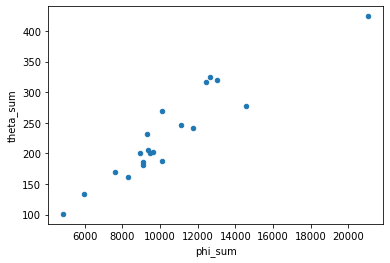

In [27]:
TOPIC.plot.scatter('phi_sum','theta_sum');

## Compute Topic Entropy over Terms

In [28]:
PHI_P = (PHI.T / PHI.T.sum())
PHI_I = np.log2(1/PHI_P)
TOPIC['h'] = round((PHI_I * PHI_P).sum().sort_values(ascending=False), 2)

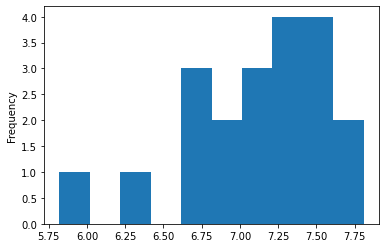

In [29]:
TOPIC.h.plot.hist();

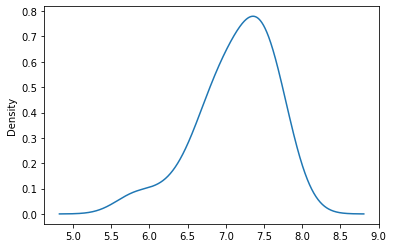

In [30]:
TOPIC.h.plot.kde();

In [31]:
PHI_TF = (PHI.T / PHI.T.sum()).T

In [32]:
foo = PHI.mean().quantile(.4)

In [33]:
PHI_DF = PHI[PHI > foo].count()

In [34]:
PHI_TFIDF = PHI * np.log2(n_topics/PHI_DF)

In [35]:
PHI_TFIDF.loc[1].sort_values(ascending=False).head(10)

term_str
table        1469.671649
hash         1015.869199
array         544.779036
tables        478.130030
element       437.120694
item          408.674196
key           385.686190
elements      364.048247
data          329.336547
structure     246.447513
Name: 1, dtype: float64

In [36]:
PHI.loc[1].sort_values(ascending=False).head(10)

term_str
set          398.895645
table        340.050000
data         329.336547
structure    246.447513
hash         235.050000
key          192.843095
elements     182.024124
element      159.709970
tables       143.931481
value        141.681953
Name: 1, dtype: float64

## Compute Doc Entropy over Topics

In [37]:
THETA_I = np.log2(1/THETA.T)

In [38]:
THETA_I

doc_id,0,1,2,3,4,5,6,7,8,9,...,4580,4581,4582,4583,4584,4585,4586,4587,4588,4589
doc_title,Abstract data type,Associative array,Augmented map,Cardinal tree,Collection (abstract data type),Container (abstract data type),Double-ended priority queue,Double-ended queue,Graph (abstract data type),Iterator,...,Thread-local storage,Undefined variable,Uninitialized variable,Unreferenced variable,Variable lifetime,Variable shadowing,Volatile (computer programming),Google Chart API,Google Charts,JavaScript InfoVis Toolkit
topic_id,,,,,,,,,,,,,,,,,,,,,
0,11.377211,5.537600,9.569856,8.491853,10.179909,9.714246,8.569856,8.321928,9.994353,9.366322,...,11.103288,9.076816,8.129283,9.129283,11.154818,10.471675,9.936638,10.179909,8.491853,9.228819
1,2.226323,1.023149,0.852980,8.491853,0.983217,1.551417,0.359132,0.088308,1.349469,1.806846,...,11.103288,9.076816,8.129283,9.129283,11.154818,10.471675,9.936638,10.179909,8.491853,9.228819
2,11.377210,10.550747,9.569856,8.491853,10.179909,3.103892,8.569856,8.321928,9.994353,3.702429,...,5.226750,9.076816,8.129283,9.129283,11.154818,10.471675,9.936638,10.179909,8.491853,9.228819
3,2.767915,10.550747,9.569856,8.491853,2.363377,0.937126,8.569856,8.321928,9.994353,0.858365,...,0.225270,0.453719,1.195797,0.674035,0.151614,0.196579,0.166409,10.179909,8.491853,9.228819
4,11.377210,10.550747,9.569856,8.491853,10.179909,9.714246,8.569856,8.321928,2.525082,9.366322,...,11.103288,9.076816,8.129283,9.129283,11.154818,10.471675,9.936638,10.179909,8.491853,9.228819
5,11.377210,10.550747,9.569856,8.491853,10.179909,9.714245,8.569856,8.321928,9.994353,9.366322,...,11.103288,9.076816,8.129283,9.129283,11.154818,10.471675,9.936638,10.179909,8.491853,9.228819
6,11.377211,10.550747,9.569856,8.491853,10.179909,9.714246,8.569856,8.321928,9.994353,9.366322,...,11.103288,9.076816,2.051108,9.129283,11.154818,10.471675,9.936638,10.179909,8.491853,9.228819
7,2.007107,10.550747,9.569856,8.491853,2.824448,9.714245,8.569856,8.321928,9.994353,9.366322,...,11.103288,9.076816,8.129283,9.129283,3.444381,10.471675,9.936638,4.342156,3.698267,2.516915


In [39]:
THETA_I.index.name

'topic_id'

In [40]:
THETA.T.index.name

'topic_id'

In [41]:
DOC.head()

,,doc_summary_clean
doc_id,doc_title,
0,Abstract data type,"In computer science, an abstract data type (AD..."
1,Associative array,"In computer science, an associative array, ma..."
2,Augmented map,"In computer science, the augmented map is an a..."
3,Cardinal tree,"A cardinal tree (or trie) of degree k, by anal..."
4,Collection (abstract data type),"In computer programming, a collection is a gro..."


In [42]:
THETA_I.index

RangeIndex(start=0, stop=20, step=1, name='topic_id')

In [43]:
DOC['h'] = (THETA_I * THETA.T).sum()

<ipython-input-43-c2fecf79c1b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DOC['h'] = (THETA_I * THETA.T).sum()


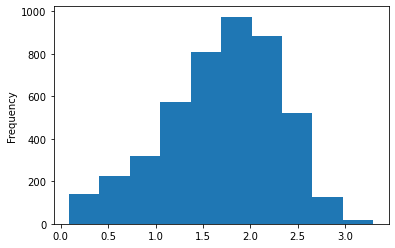

In [44]:
DOC.h.plot.hist();

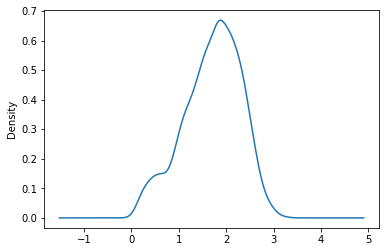

In [45]:
DOC.h.plot.kde();

In [46]:
DOC

,,doc_summary_clean,h
doc_id,doc_title,,
0,Abstract data type,"In computer science, an abstract data type (AD...",2.765873
1,Associative array,"In computer science, an associative array, ma...",2.166284
2,Augmented map,"In computer science, the augmented map is an a...",1.509225
3,Cardinal tree,"A cardinal tree (or trie) of degree k, by anal...",1.414301
4,Collection (abstract data type),"In computer programming, a collection is a gro...",2.006603
...,...,...,...
4585,Variable shadowing,"In computer programming, variable shadowing oc...",0.795260
4586,Volatile (computer programming),"In computer programming, particularly in the ...",0.644608
4587,Google Chart API,The Google Chart API is an interactive Web ser...,1.189953


# Inspect resuts

### Create TOPIC and get Top Terms per Topic

In [47]:
n_top_terms = round(TOPIC.h.mean())

In [48]:
n_top_terms

7

In [49]:
TOPIC['top_terms'] = PHI.apply(lambda x: ' '.join(x.sort_values(ascending=False).head(n_top_terms).index), 1)

In [50]:
TOPIC

,phi_sum,theta_sum,h,top_terms
topic_id,,,,
0,7586.795330,168.975718,7.10,network neural networks artificial image deep ...
1,8321.520937,161.665947,7.33,set table data structure hash key elements
2,10079.551019,187.598025,7.34,algorithm algorithms input solution time probl...
3,9114.040723,181.331331,7.19,object programming class languages variable pr...
4,12453.997388,317.516591,7.05,space matrix linear vector dimensional mathema...
5,10077.595427,270.079497,7.38,language natural text research semantic corpus...
6,11724.658220,242.004072,7.37,test sample mean value error statistical variance
7,21028.479965,423.977157,7.61,data information systems management used proce...
8,4868.014760,101.150913,5.82,search tree binary nodes node trees log


In [51]:
TOPIC['label'] = TOPIC.apply(lambda x: f"{x.name}: {x.top_terms}", 1)

In [52]:
TOPIC

,phi_sum,theta_sum,h,top_terms,label
topic_id,,,,,
0,7586.795330,168.975718,7.10,network neural networks artificial image deep ...,0: network neural networks artificial image de...
1,8321.520937,161.665947,7.33,set table data structure hash key elements,1: set table data structure hash key elements
2,10079.551019,187.598025,7.34,algorithm algorithms input solution time probl...,2: algorithm algorithms input solution time pr...
3,9114.040723,181.331331,7.19,object programming class languages variable pr...,3: object programming class languages variable...
4,12453.997388,317.516591,7.05,space matrix linear vector dimensional mathema...,4: space matrix linear vector dimensional math...
5,10077.595427,270.079497,7.38,language natural text research semantic corpus...,5: language natural text research semantic cor...
6,11724.658220,242.004072,7.37,test sample mean value error statistical variance,6: test sample mean value error statistical va...
7,21028.479965,423.977157,7.61,data information systems management used proce...,7: data information systems management used pr...
8,4868.014760,101.150913,5.82,search tree binary nodes node trees log,8: search tree binary nodes node trees log


## Sort Topics by Doc Weight


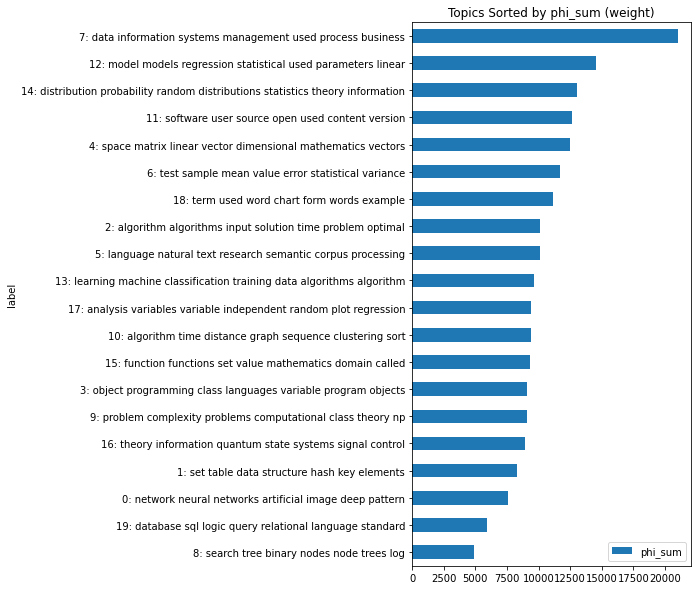

In [53]:
TOPIC.sort_values('phi_sum', ascending=True).plot.barh(y='phi_sum', x='label', title = "Topics Sorted by phi_sum (weight)", figsize=(5, n_topics/2));

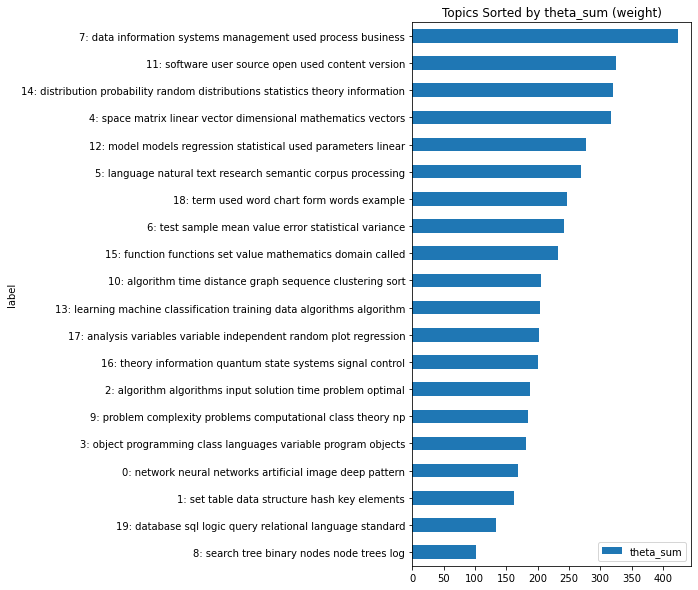

In [54]:
TOPIC.sort_values('theta_sum', ascending=True).plot.barh(y='theta_sum', x='label', title = "Topics Sorted by theta_sum (weight)", figsize=(5,n_topics/2));

# Save

In [55]:
TOPIC.to_csv('TOPIC.csv')
THETA.to_csv("THETA.csv")
PHI.to_csv('PHI.csv')